Line 1: (0,0) to (5,5)
  Bresenham pixels: 6
  DDA pixels      : 6

Line 2: (2,2) to (8,2)
  Bresenham pixels: 7
  DDA pixels      : 7

Line 3: (1,1) to (1,6)
  Bresenham pixels: 6
  DDA pixels      : 6

Line 4: (4,4) to (8,6)
  Bresenham pixels: 5
  DDA pixels      : 5

Line 5: (4,4) to (0,6)
  Bresenham pixels: 5
  DDA pixels      : 5

Line 6: (6,6) to (2,2)
  Bresenham pixels: 5
  DDA pixels      : 5

Line 7: (0,8) to (6,2)
  Bresenham pixels: 7
  DDA pixels      : 7



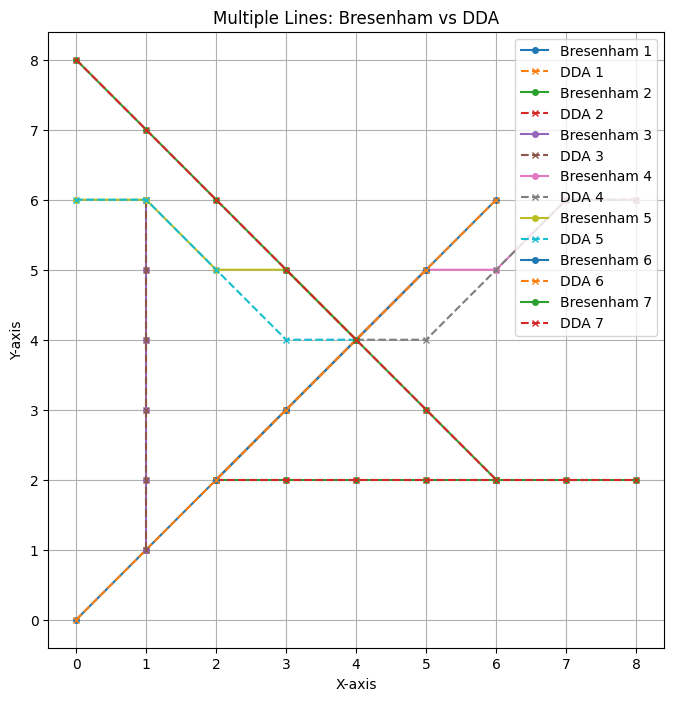

In [22]:
import matplotlib.pyplot as plt

def bresenham_line(x1, y1, x2, y2):
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1

    sx = 1 if x2 >= x1 else -1
    sy = 1 if y2 >= y1 else -1

    if dx > dy:
        d = 2 * dy - dx
        for _ in range(dx + 1):
            points.append((x, y))
            if d >= 0:
                y += sy
                d -= 2 * dx
            x += sx
            d += 2 * dy
    else:
        d = 2 * dx - dy
        for _ in range(dy + 1):
            points.append((x, y))
            if d >= 0:
                x += sx
                d -= 2 * dy
            y += sy
            d += 2 * dx
    return points


def dda_line(x1, y1, x2, y2):
    points = []
    dx = x2 - x1
    dy = y2 - y1

    steps = int(max(abs(dx), abs(dy)))
    x_inc = dx / steps
    y_inc = dy / steps

    x, y = x1, y1
    for _ in range(steps + 1):
        points.append((round(x), round(y)))
        x += x_inc
        y += y_inc
    return points


def draw_multiple_lines():

    lines = [
        ((0, 0), (5, 5)),
        ((2, 2), (8, 2)),
        ((1, 1), (1, 6)),
        ((4, 4), (8, 6)),
        ((4, 4), (0, 6)),
        ((6, 6), (2, 2)),
        ((0, 8), (6, 2)),
    ]

    plt.figure(figsize=(8, 8))

    for i, ((x1, y1), (x2, y2)) in enumerate(lines):
        bresenham_pts = bresenham_line(x1, y1, x2, y2)
        dda_pts = dda_line(x1, y1, x2, y2)


        bx, by = zip(*bresenham_pts)
        dx, dy = zip(*dda_pts)


        plt.plot(bx, by, 'o-', label=f'Bresenham {i+1}', markersize=4)
        plt.plot(dx, dy, 'x--', label=f'DDA {i+1}', markersize=4)


        print(f"Line {i+1}: ({x1},{y1}) to ({x2},{y2})")
        print(f"  Bresenham pixels: {len(bresenham_pts)}")
        print(f"  DDA pixels      : {len(dda_pts)}")
        print("")


    plt.title("Multiple Lines: Bresenham vs DDA")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


if __name__ == "__main__":
    draw_multiple_lines()
